### ✅ 목표
- 손글씨 데이터 숫자(0~9)를 분류하는 모델을 만들어 보자
- 분류 모델의 불확실성을 확인하고 이해
- 이미지 데이터의 형태를 알아보자

In [1]:
# 필요한 라이브러리 import

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
# 데이터 가져오기

digit = pd.read_csv('data/digit_train.csv')
digit

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- 📌 데이터 분석
- label : 0~9까지 정답이 들어있는 컬럼
- pixelXXX : 이미지의 픽셀 정보 값이 들어있는 컬럼

### ✅ 전처리
- 학습용 데이터이기에 깔끔하게 처리되어 있다.

### ✅ EDA

In [3]:
img0 = digit.iloc[0, 1 : ]

In [5]:
print(img0.min())
print(img0.max())
# 현재 손글씨 데이터는 흑백 데이터
# 0인 경우 검은색
# 1인 경우 흰색

0
255


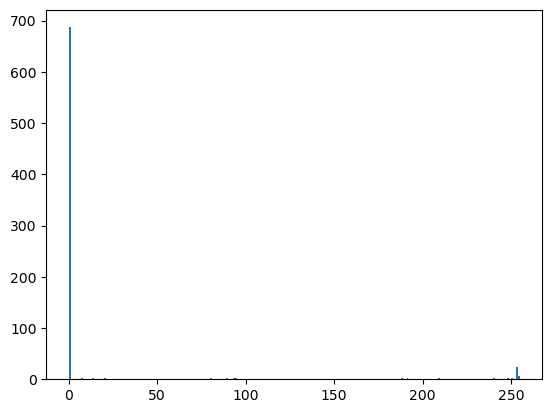

In [6]:
plt.hist(img0, bins=255)

plt.show()

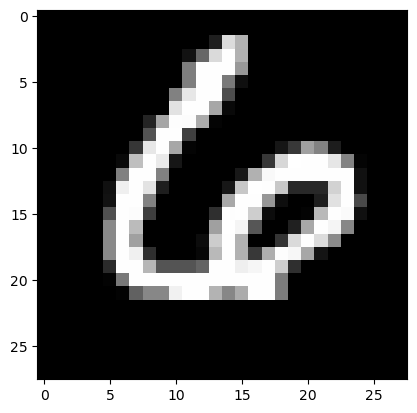

In [8]:
# 이미지 출력 방법

img0 = digit.iloc[32000, 1 : ]

plt.imshow(img0.values.reshape(28, 28), cmap='gray')

plt.show()

In [9]:
rs = digit.iloc[32000, 0]
rs

6

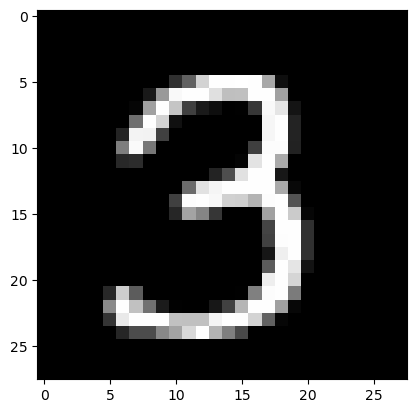

3


In [10]:
# 이미지 출력 방법

img0 = digit.iloc[1273, 1 : ]

plt.imshow(img0.values.reshape(28, 28), cmap='gray')
plt.show()

rs = digit.iloc[1273, 0]
print(rs)

In [11]:
# 문제 / 정답 나눠주기

X = digit.iloc[ : , 1 : ]
y = digit['label']

### ✅ 선형 분류모델 사용하기

In [12]:
# model import

from sklearn.linear_model import LogisticRegression

In [13]:
# 모델 객체 생성

logi = LogisticRegression()

In [14]:
# 데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state=7)

In [15]:
# 모델 학습

logi.fit(X_train, y_train)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# 모델 성능 평가

logi.score(X_test, y_test)

0.9138095238095238

In [17]:
# 모델 예측

pre = logi.predict(X_test)
pre

array([1, 1, 4, ..., 2, 4, 1], dtype=int64)

### ✅ 스케일링 적용

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
mm_scale = MinMaxScaler()

In [20]:
mm_scale.fit(X_train)

MinMaxScaler()

In [22]:
# 스케일링 적용

X_train_mm = mm_scale.transform(X_train)
X_test_mm = mm_scale.transform(X_test)

(array([649.,  14.,   7.,   5.,   9.,   6.,   2.,   6.,  15.,  71.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

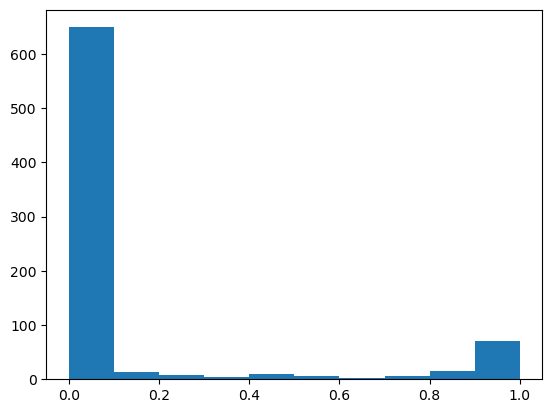

In [23]:
plt.hist(X_train_mm[0])

In [24]:
logi2 = LogisticRegression()

logi2.fit(X_train_mm, y_train)

logi2.score(X_test_mm, y_test)

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9169047619047619

In [25]:
# knn 모델 사용해보기

from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier() # 모델 객체 생성

In [27]:
knn.fit(X_train_mm, y_train) # 모델 학습

KNeighborsClassifier()

In [34]:
knn.score(X_test_mm, y_test)

AttributeError: 'NoneType' object has no attribute 'split'

In [33]:
!pip install numpy==1.21.1

     ---------------------------------------- 0.0/10.3 MB ? eta -:--:--
     --------------------------------------- 0.0/10.3 MB 330.3 kB/s eta 0:00:31
     ---------------------------------------- 0.1/10.3 MB 1.4 MB/s eta 0:00:08
     -- ------------------------------------- 0.7/10.3 MB 5.2 MB/s eta 0:00:02
     ---- ----------------------------------- 1.2/10.3 MB 7.0 MB/s eta 0:00:02
     ------ --------------------------------- 1.8/10.3 MB 8.0 MB/s eta 0:00:02
     --------- ------------------------------ 2.3/10.3 MB 8.7 MB/s eta 0:00:01
     ----------- ---------------------------- 2.9/10.3 MB 9.2 MB/s eta 0:00:01
     ------------- -------------------------- 3.3/10.3 MB 9.2 MB/s eta 0:00:01
     --------------- ------------------------ 3.9/10.3 MB 9.6 MB/s eta 0:00:01
     ----------------- ---------------------- 4.5/10.3 MB 9.8 MB/s eta 0:00:01
     ------------------- -------------------- 5.0/10.3 MB 10.0 MB/s eta 0:00:01
     --------------------- ------------------ 5.6/10.3 MB

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [295 lines of output]
  setup.py:63: RuntimeWarning: NumPy 1.21.1 may not yet support Python 3.11.
    warnings.warn(
  Running from numpy source directory.
  Processing numpy/random\_bounded_integers.pxd.in
  Processing numpy/random\bit_generator.pyx
  Processing numpy/random\mtrand.pyx
  Processing numpy/random\_bounded_integers.pyx.in
  Processing numpy/random\_common.pyx
  Processing numpy/random\_generator.pyx
  Processing numpy/random\_mt19937.pyx
  Processing numpy/random\_pcg64.pyx
  Processing numpy/random\_philox.pyx
  Processing numpy/random\_sfc64.pyx
  Cythonizing sources
  blas_opt_info:
  blas_mkl_info:
  No module named 'numpy.distutils._msvccompiler' in numpy.distutils; trying from distutils
  customize MSVCCompiler
    libraries mkl_rt not found in ['C:\\Users\\smhrd\\anaconda3\\lib', 'C:\\', 'C:\\Users\\smhrd\\anaconda3\\libs']
    NOT AVAILABLE
  
  blis_info:
    libraries blis not found in ['C:\\Users\\s

### ✅ 분류 예측의 불확실성

In [35]:
# predict_proba : 분류 예측을 진행할 때 각 정답별 예측 확률을 보여주는 기능

knn.predict_proba(X_test.values[50:80])

array([[0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. ],
       [0.2, 0. , 0. , 0. , 0.6, 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0.2],
       [0.6, 0. , 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0.6],
       [0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0.4, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0. ],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.4, 0. , 0. , 0. , 0. , 0. , 0.6, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. ],
       [0.6, 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. 

- 📌 predict_proba : 각 정답별 예측 확률을 뽑아서 가장 높은 확률을 가진 정답을 예측값으로 도출
- 각 확률 중 가장 높은 확률 값만 가져와서 현재 집어넣은 데이터에 예측 퍼센테이지를 추출해서 출력해서 사용할 수 있다.